In [2]:
import os
import numpy as np
import pandas as pd
from hpfrec import HPF
from scipy import sparse

# Set random seed for reproducibility
randseed = 26499506
print("random seed: ", randseed)
np.random.seed(randseed)

DATA_DIR = 'C:/Users/Sten Stokroos/Desktop/zelf/neural_collaborative_filtering/Data'



train_df = pd.read_csv(os.path.join(DATA_DIR, 'ml-1m.train.rating'), sep="\t", header=None, names=['userId', 'songId', 'rating'], usecols=[0, 1, 2], engine="python")
test_df = pd.read_csv(os.path.join(DATA_DIR, 'ml-1m.test.rating'), sep="\t", header=None, names=['userId', 'songId', 'rating'], usecols=[0, 1, 2], engine="python")

# Rename columns to 'UserId', 'ItemId', 'Count'
train_df = train_df.rename(columns={'userId': 'UserId', 'songId': 'ItemId', 'rating': 'Count'})
test_df = test_df.rename(columns={'userId': 'UserId', 'songId': 'ItemId', 'rating': 'Count'})

print(train_df.head)



random seed:  26499506
<bound method NDFrame.head of         UserId  ItemId  Count
0            0      32      4
1            0      34      4
2            0       4      5
3            0      35      4
4            0      30      4
...        ...     ...    ...
994166    6039    1092      5
994167    6039      41      4
994168    6039     128      5
994169    6039     323      4
994170    6039     669      4

[994171 rows x 3 columns]>


In [3]:

# Convert ratings to binary exposure data (1 if Count > 0, else 0)
train_df['Count'] = (train_df['Count'] > 0).astype(int)
test_df['Count'] = (test_df['Count'] > 0).astype(int)

# Initialize and fit the HPF model
recommender = HPF(
    k=30, a=0.3, a_prime=0.3, b_prime=1.0,
    c=0.3, c_prime=0.3, d_prime=1.0, ncores=-1,
    stop_crit='train-llk', check_every=10, stop_thr=1e-4,
    users_per_batch=None, items_per_batch=None, step_size=lambda x: 1/np.sqrt(x+2),
    maxiter=100, use_float=True, reindex=False, verbose=True,
    random_seed=None, allow_inconsistent_math=False, full_llk=False,
    alloc_full_phi=False, keep_data=True, save_folder=None,
    produce_dicts=True, keep_all_objs=True, sum_exp_trick=False
)

# Fit the model to the training data
recommender.fit(train_df)

# Get unique user and item IDs
user_ids = train_df['UserId'].unique()
item_ids = train_df['ItemId'].unique()

# Initialize an empty matrix for exposures
exposure_matrix = np.zeros((len(user_ids), len(item_ids)))

# Predict the exposure data for all user-item pairs
for i, user in enumerate(user_ids):
    exposures = recommender.predict(user=[user] * len(item_ids), item=item_ids)
    exposure_matrix[i, :] = exposures

# Convert the exposure matrix to a DataFrame
exposure_df = pd.DataFrame(exposure_matrix, index=user_ids, columns=item_ids)

# Save the exposure matrix to a CSV file
exposure_df.to_csv('C:/Users/Sten Stokroos/Desktop/Thesis2.0/zelf/xposure_matrix.csv',index = False, header = False )

print("Exposure matrix saved to exposure_matrix.csv")

**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 6040
Number of items: 3706
Latent factors to use: 30

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | train llk: -2884687 | train rmse: 0.7964
Iteration 20 | train llk: -2554191 | train rmse: 0.7387
Iteration 30 | train llk: -2390420 | train rmse: 0.6958
Iteration 40 | train llk: -2359765 | train rmse: 0.6890
Iteration 50 | train llk: -2347088 | train rmse: 0.6862
Iteration 60 | train llk: -2340591 | train rmse: 0.6849
Iteration 70 | train llk: -2336932 | train rmse: 0.6842
Iteration 80 | train llk: -2334743 | train rmse: 0.6838


Optimization finished
Final log-likelihood: -2334743
Final RMSE: 0.6838
Minutes taken (optimization part): 0.9

Exposure matrix saved to exposure_matrix.csv


random seed:  26499506
Training HPF model with k=1...
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 6040
Number of items: 3706
Latent factors to use: 1

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | train llk: -2883692 | train rmse: 0.7956
Iteration 20 | train llk: -2883692 | train rmse: 0.7956


Optimization finished
Final log-likelihood: -2883692
Final RMSE: 0.7956
Minutes taken (optimization part): 0.0



100%|██████████| 6040/6040 [00:40<00:00, 147.97it/s]


Average NDCG for k=1: 0.2550067626327217
Training HPF model with k=5...
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 6040
Number of items: 3706
Latent factors to use: 5

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | train llk: -2883082 | train rmse: 0.7956
Iteration 20 | train llk: -2730768 | train rmse: 0.7727
Iteration 30 | train llk: -2626921 | train rmse: 0.7554
Iteration 40 | train llk: -2615375 | train rmse: 0.7524
Iteration 50 | train llk: -2611931 | train rmse: 0.7509
Iteration 60 | train llk: -2610368 | train rmse: 0.7501


Optimization finished
Final log-likelihood: -2610368
Final RMSE: 0.7501
Minutes taken (optimization part): 0.2



100%|██████████| 6040/6040 [00:41<00:00, 147.02it/s]


Average NDCG for k=5: 0.29895081983109023
Training HPF model with k=50...
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 6040
Number of items: 3706
Latent factors to use: 50

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | train llk: -2887237 | train rmse: 0.7968
Iteration 20 | train llk: -2518603 | train rmse: 0.7296
Iteration 30 | train llk: -2352815 | train rmse: 0.6871
Iteration 40 | train llk: -2329587 | train rmse: 0.6815
Iteration 50 | train llk: -2323306 | train rmse: 0.6802
Iteration 60 | train llk: -2321365 | train rmse: 0.6799


Optimization finished
Final log-likelihood: -2321365
Final RMSE: 0.6799
Minutes taken (optimization part): 1.5



100%|██████████| 6040/6040 [00:42<00:00, 141.90it/s]


Average NDCG for k=50: 0.3774453141423828
Training HPF model with k=100...
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 6040
Number of items: 3706
Latent factors to use: 100

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | train llk: -2892835 | train rmse: 0.7973
Iteration 20 | train llk: -2485320 | train rmse: 0.7182
Iteration 30 | train llk: -2367721 | train rmse: 0.6874
Iteration 40 | train llk: -2354620 | train rmse: 0.6842
Iteration 50 | train llk: -2350100 | train rmse: 0.6833
Iteration 60 | train llk: -2346190 | train rmse: 0.6826
Iteration 70 | train llk: -2343864 | train rmse: 0.6823


Optimization finished
Final log-likelihood: -2343864
Final RMSE: 0.6823
Minutes taken (optimization part): 3.2



100%|██████████| 6040/6040 [00:39<00:00, 152.28it/s]


Average NDCG for k=100: 0.377439790666001


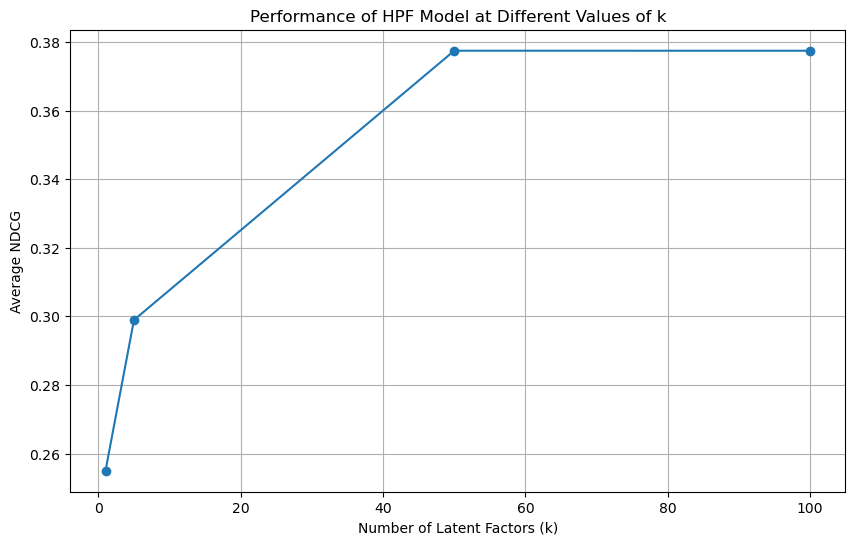

Performance results saved to performance_results.csv


In [5]:
import os
import numpy as np
import pandas as pd
from hpfrec import HPF
import heapq
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set random seed for reproducibility
randseed = 26499506
print("random seed: ", randseed)
np.random.seed(randseed)

DATA_DIR = 'C:/Users/Sten Stokroos/Desktop/zelf/neural_collaborative_filtering/Data'

train_df = pd.read_csv(os.path.join(DATA_DIR, 'ml-1m.train.rating'), sep="\t", header=None, names=['userId', 'songId', 'rating'], usecols=[0, 1, 2], engine="python")
test_df = pd.read_csv(os.path.join(DATA_DIR, 'ml-1m.test.rating'), sep="\t", header=None, names=['userId', 'songId', 'rating'], usecols=[0, 1, 2], engine="python")

# Rename columns to 'UserId', 'ItemId', 'Count'
train_df = train_df.rename(columns={'userId': 'UserId', 'songId': 'ItemId', 'rating': 'Count'})
test_df = test_df.rename(columns={'userId': 'UserId', 'songId': 'ItemId', 'rating': 'Count'})

# Convert ratings to binary exposure data (1 if Count > 0, else 0)
train_df['Count'] = (train_df['Count'] > 0).astype(int)
test_df['Count'] = (test_df['Count'] > 0).astype(int)

# Get unique user and item IDs
user_ids = train_df['UserId'].unique()
item_ids = train_df['ItemId'].unique()
num_users = len(user_ids)
num_items = len(item_ids)

# Combine train and test to get all observed items for each user
all_observed_df = pd.concat([train_df, test_df])

# Define evaluation functions
def getNDCG(ranklist, gtItem):
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item == gtItem:
            return math.log(2) / math.log(i + 2)
    return 0

def eval_one_rating(idx, model, test_ratings, topk, all_items, all_observed_df, num_negatives=100):
    rating = test_ratings[idx]
    user = rating[0]
    gtItem = rating[1]
    
    # Get all items this user has observed
    observed_items = all_observed_df[all_observed_df['UserId'] == user]['ItemId'].tolist()
    
    # Generate negative samples: items the user has not interacted with
    negative_samples = list(np.random.choice(list(set(all_items) - set(observed_items)), num_negatives, replace=False))
    negative_samples.append(gtItem)
    
    # Get prediction scores
    map_item_score = {}
    users = np.full(len(negative_samples), user, dtype='int32')
    predictions = model.predict(user=users, item=np.array(negative_samples))
    
    for i in range(len(negative_samples)):
        item = negative_samples[i]
        map_item_score[item] = predictions[i]

    # Evaluate top rank list
    ranklist = heapq.nlargest(topk, map_item_score, key=map_item_score.get)
    ndcg = getNDCG(ranklist, gtItem)
    return ndcg

# Values of k to evaluate
k_values = [1, 5, 50, 100]
performance = []

# Prepare test ratings
test_ratings = test_df[['UserId', 'ItemId']].values.tolist()

for k in k_values:
    print(f"Training HPF model with k={k}...")
    recommender = HPF(
        k=k, a=0.3, a_prime=0.3, b_prime=1.0,
        c=0.3, c_prime=0.3, d_prime=1.0, ncores=-1,
        stop_crit='train-llk', check_every=10, stop_thr=1e-3,
        users_per_batch=None, items_per_batch=None, step_size=lambda x: 1/np.sqrt(x+2),
        maxiter=100, use_float=True, reindex=False, verbose=True,
        random_seed=None, allow_inconsistent_math=False, full_llk=False,
        alloc_full_phi=False, keep_data=True, save_folder=None,
        produce_dicts=True, keep_all_objs=True, sum_exp_trick=False
    )

    # Fit the model to the training data
    recommender.fit(train_df)
    topk = 10
    # Evaluate the model using NDCG
    ndcg_scores = [eval_one_rating(i, recommender, test_ratings, topk, item_ids, all_observed_df) for i in tqdm(range(len(test_ratings)))]
    avg_ndcg = np.mean(ndcg_scores)
    performance.append(avg_ndcg)
    print(f"Average NDCG for k={k}: {avg_ndcg}")

# Plot the performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, performance, marker='o')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average NDCG')
plt.title('Performance of HPF Model at Different Values of k')
plt.grid(True)
plt.show()

# Optional: Save the performance results to a CSV file
performance_df = pd.DataFrame({'k': k_values, 'avg_ndcg': performance})
performance_df.to_csv('C:/Users/Sten Stokroos/Desktop/Thesis2.0/zelf/performance_results.csv', index=False)

print("Performance results saved to performance_results.csv")


In [1]:
# #rating > 3

# #2 expchs, no confounders

# End. Best Iteration 1:  HR = 0.5467, NDCG = 0.3111.

# #2 epochs with confounders

# End. Best Iteration 1:  HR = 0.5177, NDCG = 0.2926.

SyntaxError: invalid syntax (3384023181.py, line 1)

In [1]:
#Rating > 0

#with confouners
# End. Best Iteration 1:  HR = 0.6070, NDCG = 0.3575.
#wihtout confounders
#End. Best Iteration 1:  HR = 0.6258, NDCG = 0.3601.

import multiprocessing
evaluation_threads = multiprocessing.cpu_count()
print(f"Number of available CPU cores: {evaluation_threads}")


Number of available CPU cores: 12
